In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
pd.set_option('mode.chained_assignment', None)



path = snakemake.input[0]
w = snakemake.wildcards

print(path)
print(w)

#######################
rawdf = pd.read_csv(path, sep='\t')
conds = [name for name in rawdf.columns if '_' in name]

df = rawdf.filter(conds)
df = df.astype(int)
tdf = df.transpose()
#display(tdf)

# Separating out the features
x = tdf.loc[:, tdf.columns].values
y = tdf.index# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=comps)
pca.fit(x)

exp1, exp2 = pca.explained_variance_ratio_

exP1 = round(exp1*100, 1)
exP2 = round(exp2*100, 1)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Dim 1', 'Dim 2'], index=tdf.index)
pdf = principalDf.reset_index()
pdf['probe'] = pdf['index'].apply(lambda x: x.split('_')[0])
pdf['probe'][pdf['probe'] == 'Neg-Ctl'] = 'CTRL'
#display(pdf)

sns.set(rc={'figure.figsize':(6,4), 'ytick.left': True, 'xtick.bottom': True}, font_scale = 1.3, style='whitegrid')
sns.scatterplot(data=pdf, x='Dim 1', y='Dim 2', hue='probe', s=90)
plt.xlabel(f'Dim 1 ({exP1}%)')
plt.ylabel(f'Dim 2 ({exP2}%)')
plt.ylim([-100, 125])
plt.xlim([-100, 125])
plt.tight_layout()
plt.savefig(snakemake.output[0])
plt.show()

## Backup

Index(['Ensembl gene id', 'Ensembl gene', 'Ensembl biotype',
       'UniProt proteins', 'UniProt genes', 'UniProt accessions',
       'UniProt names', 'UniProt Ensembl transcripts',
       'UniProt Ensembl proteins', 'UniProt Ensembl gene ids', 'Ensembl chr',
       'Ensembl start', 'Ensembl stop', 'Ensembl strand', 'KEGG PATHWAY terms',
       'KEGG PATHWAY ids', 'Gene Ontology terms', 'Gene Ontology ids',
       'Neg-Ctl_1', 'Neg-Ctl_2', 'Neg-Ctl_3', 'miR-197_1', 'miR-197_2',
       'miR-197_3', 'miR-769_1', 'miR-769_2', 'miR-769_3'],
      dtype='object')

,0,1,2,3,4,5,6,7,8,9,...,23260,23261,23262,23263,23264,23265,23266,23267,23268,23269
Neg-Ctl_1,2487,5,13,715,559,312,62,407,337,67,...,11,732,2,2,1048,647,3,211,518,0
Neg-Ctl_2,2459,5,15,706,599,284,57,414,362,61,...,12,714,3,4,1030,652,1,193,524,1
Neg-Ctl_3,2625,0,12,718,604,336,54,352,319,50,...,8,771,5,2,1034,688,8,222,528,1
miR-197_1,2460,6,14,647,560,387,59,438,335,58,...,5,813,2,1,1041,658,4,187,624,1
miR-197_2,2770,0,13,770,766,333,62,424,419,47,...,11,830,5,1,1142,620,3,168,594,0
miR-197_3,2514,2,9,653,578,381,58,396,310,65,...,12,811,1,1,1041,607,1,192,666,0
miR-769_1,2455,2,13,694,569,315,43,403,356,60,...,8,774,3,5,1060,652,3,231,497,3
miR-769_2,2574,2,12,693,600,367,57,350,360,66,...,8,818,0,8,1045,658,1,235,566,0
miR-769_3,2482,2,12,682,716,326,62,382,390,58,...,10,736,2,6,1062,665,2,260,527,0


/tmp/ipykernel_555806/2486412713.py:53: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pdf['probe'][pdf['probe'] == 'Neg-Ctl'] = 'CTRL'


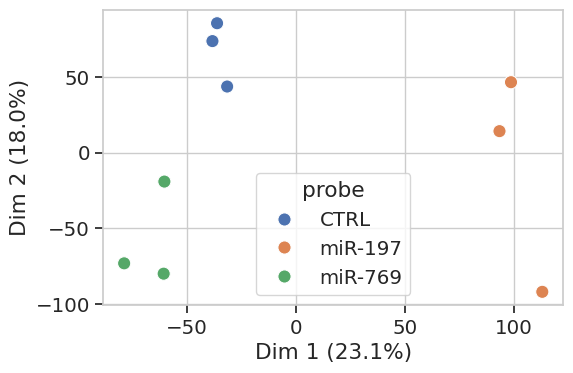

Index(['Ensembl gene id', 'Ensembl gene', 'Ensembl biotype',
       'UniProt proteins', 'UniProt genes', 'UniProt accessions',
       'UniProt names', 'UniProt Ensembl transcripts',
       'UniProt Ensembl proteins', 'UniProt Ensembl gene ids', 'Ensembl chr',
       'Ensembl start', 'Ensembl stop', 'Ensembl strand', 'KEGG PATHWAY terms',
       'KEGG PATHWAY ids', 'Gene Ontology terms', 'Gene Ontology ids',
       'CTRL_1', 'CTRL_2', 'CTRL_3', 'CTRL_4', 'miR-197_1', 'miR-197_2',
       'miR-197_3', 'miR-197_4', 'miR-769_1', 'miR-769_2', 'miR-769_3'],
      dtype='object')

,0,1,2,3,4,5,6,7,8,9,...,23516,23517,23518,23519,23520,23521,23522,23523,23524,23525
CTRL_1,228,154,16,194,202,151,239,12,1,2,...,136,6,141,308,622,3,52,53,59,1
CTRL_2,248,146,8,196,194,164,244,9,4,2,...,137,5,120,297,688,2,44,48,37,1
CTRL_3,215,173,12,168,194,152,253,9,3,1,...,144,4,114,289,699,2,57,41,66,1
CTRL_4,239,166,9,181,206,183,276,9,3,4,...,150,5,145,327,620,1,57,47,49,1
miR-197_1,238,154,12,194,179,189,263,11,4,0,...,164,7,133,320,593,4,55,33,32,1
miR-197_2,282,181,10,176,210,171,230,9,4,0,...,143,4,146,314,663,0,66,32,49,1
miR-197_3,236,180,15,162,218,173,258,12,4,0,...,152,5,143,297,648,1,59,30,54,1
miR-197_4,260,150,13,185,186,177,236,7,2,2,...,143,6,158,321,612,1,63,28,41,0
miR-769_1,279,147,13,127,213,211,235,8,3,1,...,192,3,145,239,685,3,37,32,36,1
miR-769_2,250,146,6,128,186,213,232,12,2,4,...,167,4,142,221,682,2,48,46,41,0


/tmp/ipykernel_555806/2486412713.py:53: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pdf['probe'][pdf['probe'] == 'Neg-Ctl'] = 'CTRL'


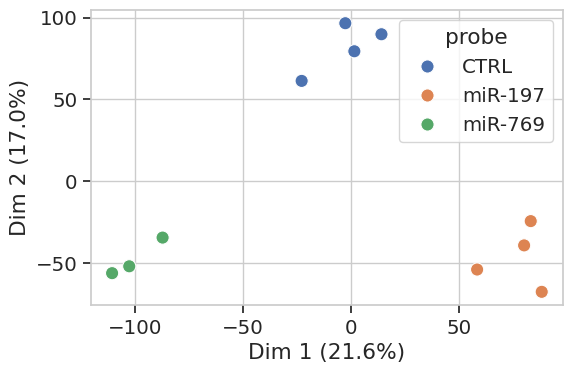

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
pd.set_option('mode.chained_assignment', None)



##########################################################################################################
human_197 = '/home/felixl/PycharmProjects/target_mirna/data/general/RNAseq/human_results_Neg_vs_mir197.tsv'
human_769 = '/home/felixl/PycharmProjects/target_mirna/data/general/RNAseq/human_results_Neg_vs_mir769.tsv'
mouse_197 = '/home/felixl/PycharmProjects/target_mirna/data/general/RNAseq/mouse_results_Neg_vs_mir197.tsv'
mouse_769 = '/home/felixl/PycharmProjects/target_mirna/data/general/RNAseq/mouse_results_Neg_vs_mir769.tsv'

pathdict = {
    'human': '/share/gluster/Projects/felix/rnaseq_iPSC_leisegang/oct21_iPSC_rnaseq/human/counts.matrix.norm_anno',
    'mouse': '/share/gluster/Projects/felix/rnaseq_iPSC_leisegang/jan22_mouse_iPSC/counts.matrix.norm_anno'
}

comps = 2

outdir = '/home/felixl/PycharmProjects/target_mirna/figures/experiment_evaluation'
##########################################################################################################

for org in pathdict:
    rawdf = pd.read_csv(pathdict[org], sep='\t')
    display(rawdf.columns)
    conds = [name for name in rawdf.columns if '_' in name]
    
    df = rawdf.filter(conds)
    df = df.astype(int)
    tdf = df.transpose()
    display(tdf)

    # Separating out the features
    x = tdf.loc[:, tdf.columns].values
    y = tdf.index# Standardizing the features
    x = StandardScaler().fit_transform(x)
    pca = PCA(n_components=comps)
    pca.fit(x)
    
    exp1, exp2 = pca.explained_variance_ratio_
    
    exP1 = round(exp1*100, 1)
    exP2 = round(exp2*100, 1)

    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['Dim 1', 'Dim 2'], index=tdf.index)
    pdf = principalDf.reset_index()
    pdf['probe'] = pdf['index'].apply(lambda x: x.split('_')[0])
    pdf['probe'][pdf['probe'] == 'Neg-Ctl'] = 'CTRL'
    #display(pdf)
    
    sns.set(rc={'figure.figsize':(6,4), 'ytick.left': True, 'xtick.bottom': True}, font_scale = 1.3, style='whitegrid')
    sns.scatterplot(data=pdf, x='Dim 1', y='Dim 2', hue='probe', s=90)
    plt.xlabel(f'Dim 1 ({exP1}%)')
    plt.ylabel(f'Dim 2 ({exP2}%)')
    # plt.ylim([-100, 125])
    # plt.xlim([-100, 125])
    plt.tight_layout()
    plt.savefig(f'{outdir}/{org}_myPCA.svg')
    plt.show()